In [1]:
import numpy as np
import matplotlib.pyplot as plt
from darts import datasets
import pandas as pd
import json
from tqdm import tqdm
from univariate.serialize import  vec_num2repr, vec_repr2num, serialize_arr, deserialize_str,SerializerSettings
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.environ['R_HOME'] = r'C:\Users\Petro\miniconda3\Lib\R'
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects import numpy2ri
from rpy2.robjects import default_converter
from rpy2.robjects.vectors import FloatVector
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
packnames = ('stlplus')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))


stlplus = importr('stlplus')


In [3]:
def use_stl(df_data,npn):
    
    r_vector = FloatVector(df_data)
    a= stlplus.stlplus(r_vector,   n_p=npn , s_window= 25, s_degree = 0, t_degree= 0, fc_window = 25, fc_degree = 0)
    season = np.asanyarray(a[0][1])
    trend = np.asanyarray(a[0][2])
    remain = np.asanyarray(a[0][3])

    return season, trend, remain

In [4]:
def min_max_scale(array, min, max):
    scaler = MinMaxScaler()
     
    if isinstance(array, int) :
        X_train_help = np.append(array, min)
        X_train_help= np.append(X_train_help, max)
        scaler.fit(X_train_help.reshape(-1, 1))
        x_scaled = scaler.transform(X_train_help.reshape(-1, 1))[0]

    else :
        
        # give the min max to the array, if they already have it don't change anything, 
        #if they do not have it it will change the scaling to the min max of the whole domain
        X_train_help = np.append(array, min)
        X_train_help= np.append(X_train_help, max)
        scaler.fit(X_train_help.reshape(-1, 1))
        x_scaled = scaler.transform(array.reshape(-1, 1))  
        x_scaled = x_scaled
    return x_scaled
    
def min_max_scale_inv(array,values_inver, min, max):
    scaler = MinMaxScaler()
     
    if isinstance(array, int) :
        X_train_help = np.append(array, min)
        X_train_help= np.append(X_train_help, max)
        scaler.fit(X_train_help.reshape(-1, 1))
        x_scaled = scaler.transform(X_train_help.reshape(-1, 1))[0]
        in_values = scaler.inverse_transform(values_inver.reshape(-1, 1))

    else :
        
        # give the min max to the array, if they already have it don't change anything, 
        #if they do not have it it will change the scaling to the min max of the whole domain
        X_train_help = np.append(array, min)
        X_train_help= np.append(X_train_help, max)
        scaler.fit(X_train_help.reshape(-1, 1))
        x_scaled = scaler.transform(array.reshape(-1, 1)) 
        in_values= scaler.inverse_transform(values_inver.reshape(-1, 1))
        #x_scaled = x_scaled
    return in_values

In [5]:
def check_same_values_at_index_rounded(arr1, arr2):
    """
    Function to check if two arrays contain the same values at the same index after rounding
    both arrays to the third decimal. If not, prints the index where the values are different.
    
    Parameters:
        arr1 (list): The first array.
        arr2 (list): The second array.
        
    Returns:
        None
    """
    if len(arr1) != len(arr2):
        print("Arrays must have the same length.")
        return
    
    for i in range(len(arr1)):
        rounded_val1 = round(arr1[i], 3)
        rounded_val2 = round(arr2[i], 3)
        if rounded_val1 != rounded_val2:
            print("Values differ at index:", i)

# Example usage:
arr1 = [0, 2.34567, 3.45678, 4.56789, 5.67890]
arr2 = [1.234, 2.346, 3.457, 4.568, 5.679]
check_same_values_at_index_rounded(arr1, arr2)


Values differ at index: 0


In [155]:
scaling_parameter

,datasetname,min,max
0,ArticularyWordRecognition,-5.099600,4.888700
1,AtrialFibrillation,-2.219500,1.568700
2,BasicMotions,-23.000828,29.068570
3,Cricket,-3.754300,2.707700
4,DuckDuckGeese,0.000004,265.300000
5,Epilepsy,-3.470000,3.220000
6,ERing,-3.114369,2.507158
7,EthanolConcentration,-104.960000,29507.000000
8,FaceDetection,-24.327769,24.326942
9,FingerMovements,-157.000000,205.100000


In [63]:
dfc= pd.DataFrame(columns=["name","values","min","forecasting","max", "season","trend","remain","season_forecasting","trend_forecasting","remain_forecasting"])

In [73]:

check = datasets.SunspotsDataset().load()
name = "SunspotsDataset"
df = check.pd_dataframe()
split = 10
period = 12

for i in range(len(df.columns)):
    
    values=df[df.columns[i]].values
    save_name= name + str(i)

    

    min = scaling_parameter[scaling_parameter["datasetname"]== save_name]["min"].values[0]
    max = scaling_parameter[scaling_parameter["datasetname"]== save_name]["max"].values[0]
    
    values=df[df.columns[i]].values

    splitted =split_array_equal_length(values,split)
    train= splitted[:-2]
    dev = splitted[-2]
    test = splitted[-1]
    
    deve,dev1 = cut_list(test, 10)
    season, trend, remain = use_stl(test,period)
    
    season, season_forecasting = cut_list(season, 10)
    trend, trend_forecasting = cut_list(trend, 10)
    remain, remain_forecasting = cut_list(remain, 10)
    
    column_d = {"name":name,"values":deve , "forecasting":dev1,"min":min, "max":max,  "season":season,"trend":trend,"remain":remain,"season_forecasting":season_forecasting,"trend_forecasting":trend_forecasting,"remain_forecasting":remain_forecasting }
    dfc.loc[len(dfc)] = column_d
    dfc = dfc.reset_index(drop=True)


In [74]:
dfc

,name,values,min,forecasting,max,season,trend,remain,season_forecasting,trend_forecasting,remain_forecasting
0,ETTh1Dataset,"[3.750999927520752, 5.559000015258789, 3.48300...",-22.705999,"[15.472000122070312, 16.075000762939453, 14.33...",23.643999,"[1.324125378702e-311, 1.1871175274748193e+178,...","[3.3527533505e-312, 3.39519326633e-312, 3.4376...","[-4.3482908242925055e-183, 1.2989146270072445e...","[9.83052252607688, 11.08453219155994, 11.76422...","[12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26....","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ..."
1,ETTh1Dataset,"[3.2149999141693115, 3.617000102996826, 2.6119...",-4.756000,"[6.564000129699707, 6.296000003814697, 4.21999...",10.114000,"[0.925618356977246, 0.7376299427757989, -0.171...","[-0.30102048214770494, -0.3500267859408125, -0...","[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12....","[0.7792926067509445, 1.0581640384970683, 0.697...","[9.33678148237e-313, 9.76118064066e-313, 1.018...","[846.0, 1.28e-321, 1.856746324e-314, 8.0379670..."
2,ETTh1Dataset,"[1.4570000171661377, 2.9140000343322754, 0.995...",-25.087999,"[11.194000244140623, 10.979999542236328, 8.883...",17.341000,"[-2.6040186684286315, -1.9201257164023937, -0....","[4.9835159162047935, 5.071311325734323, 5.1591...","[-0.9224972306100243, -0.23718557499965343, -3...","[0.7059828805580732, 3.059999536673682, 3.6774...","[8.042647372410933, 6.838764187355189, 5.19133...","[2.445369991171617, 1.0812358182074568, 0.0152..."
3,ETTh1Dataset,"[2.1679999828338623, 2.45199990272522, 1.31500...",-5.934000,"[4.192999839782715, 3.9800000190734863, 2.2030...",7.747000,"[0.0, 0.0, 2.121995791e-314, 0.0, 0.0, 0.0, 0....","[4.2439915824e-314, 8.4879831653e-314, 1.27319...","[0.0, 0.0, 0.0, 0.0, 5e-324, 0.0, 0.0, 0.0, 0....","[1.4132491971114e-311, 1.4174931886943e-311, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 5e-324, 0.0, 0.0, 0.0, 0.0, 0.0, 5e..."
4,ETTh1Dataset,"[2.345000028610229, 2.253999948501587, 2.58899...",-1.188000,"[4.507999897003174, 5.056000232696533, 4.99499...",8.498000,"[4.2439915824e-314, 8.4879831653e-314, 1.27319...","[3.7e-322, 0.0, -0.023227328485985778, -0.0225...","[0.0, 0.0, 0.0, 0.0, 0.0, 5e-324, 0.0, 0.0, 0....","[2.1219957914e-313, 2.5463949497e-313, 4.24399...","[8.4879831653e-314, 1.27319747483e-313, 1.6975...","[8.04033366372e-312, 9.14063128e-315, 3.56e-32..."
5,ETTh1Dataset,"[1.065999984741211, 1.1269999742507937, 1.2790...",-1.371000,"[1.462000012397766, 1.5529999732971191, 1.4320...",3.046000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[43.479000091552734, 46.2400016784668, 40.6110...","[0.0, 8.04079451187e-312, 9.14063128e-315, 1.7...","[7e-322, 0.0, 3.6073928455e-313, 3.6073928455e...","[0.0, 0.0, 0.0, 0.0, 2.121995791e-314, 0.0, 0....","[1.42598117186e-311, 1.430225163443e-311, 1.43..."
6,ETTh2Dataset,"[22.86899948120117, 21.025999069213867, 20.690...",0.000000,"[24.62800025939941, 27.308000564575195, 27.056...",107.892998,"[0.0, 0.0, 0.0, 5e-324, 0.0, 0.0, 0.0, 0.0, 0....","[-5.36788272189536e+298, -5.092290312484088e+2...","[2.12199579097e-313, 1.7525e-320, 1.856746329e...","[7.405765312134e-312, 7.915044302084e-312, 8.4...","[0.11621427199999991, 0.19322586059570312, 0.2...","[2.970794108e-313, 3.3951932663e-313, 3.819592..."
7,ETTh2Dataset,"[7.706999778747559, 8.125, 7.119999885559082, ...",-18.680000,"[8.711999893188478, 9.21399974822998, 10.22000...",36.438999,"[0.12555150340763196, 0.6190003467112889, 0.40...","[7.84143115341968, 7.861316905874155, 7.881202...","[-0.25998287807975284, -0.35531725258544355, -...","[-0.0051362127473909246, -0.4679892893823043, ...","[10.088900187130584, 10.019837782254827, 9.915...","[-1.3717640811947138, -0.33784874464254244, 0...."
8,ETTh2Dataset,"[35.86600112915039, 33.748001098632805, 33.346...",11.205000,"[35.678001403808594, 38.17100143432617, 37.796...",93.230003,"[-0.17516299711939995, -0.39948267540976157, -...","[35.15392771875245, 35.144891122420276, 35.135...","[0.8872364075173422, -0.997407348377706

In [35]:
scaling_parameter

,datasetname,min,max
0,ArticularyWordRecognition,-5.099600,4.888700
1,AtrialFibrillation,-2.219500,1.568700
2,BasicMotions,-23.000828,29.068570
3,Cricket,-3.754300,2.707700
4,DuckDuckGeese,0.000004,265.300000
5,Epilepsy,-3.470000,3.220000
6,ERing,-3.114369,2.507158
7,EthanolConcentration,-104.960000,29507.000000
8,FaceDetection,-24.327769,24.326942
9,FingerMovements,-157.000000,205.100000


In [75]:
dfc.to_pickle("univariate/dataset_new/test/test_mse_calc.pkl")

In [6]:
def cut_list(lst, percent_to_cut):
    # Calculate the index to cut the list
    cut_index = int(len(lst) * (1 - percent_to_cut / 100))
    
    # Get the first portion of the list
    first_portion = lst[:cut_index]
    
    # Get the second portion of the list
    second_portion = lst[cut_index:]
    
    return first_portion, second_portion


def split_array_equal_length(arr, num_splits):
    """
    Split a NumPy array into equal length lists.

    Args:
    arr (numpy.ndarray): The input NumPy array.
    num_splits (int): The number of equal length lists to split the array into.

    Returns:
    list: A list of NumPy arrays, each representing a portion of the original array.
    """
    # Check if the array can be equally split
    if len(arr) % num_splits != 0:
        raise ValueError("Array length is not divisible by the number of splits.")

    # Calculate the length of each split
    split_length = len(arr) // num_splits

    # Split the array into equal length lists
    split_arrays = np.array_split(arr, num_splits)

    return split_arrays


def arrays_to_dataframe(list_of_arrays):
    """
    Convert a list of arrays to a pandas DataFrame.

    Args:
    list_of_arrays (list): List of NumPy arrays.

    Returns:
    pandas.DataFrame: DataFrame where each array is a row in one column.
    """
    # If the list contains only one array, put it into one row
    if len(list_of_arrays) == 1:
        return pd.DataFrame({"values": [list_of_arrays[0]]})

    # Otherwise, create a DataFrame with one column named "Arrays"
    df = pd.DataFrame({"values": list_of_arrays})
    return df




In [11]:
scaling_parameter = pd.read_csv("scaling_parameters_extendet.csv",index_col=0)

In [159]:
scaling_parameter.to_csv("scaling_parameters_extendet.csv")

In [10]:
#scaling_parameter = pd.read_csv("univariate/scaling_parametes.csv",index_col=0)
settings =SerializerSettings(base=10, prec=3, signed=True, time_sep=', ', bit_sep=' ')      

In [36]:
check = datasets.ETTh1Dataset().load()
name = "ETTh1Dataset"

df = check.pd_dataframe()
for i in range(len(df.columns)):
    values=df[df.columns[i]].values
    min = np.min(values)
    max = np.max(values)
    scal_nam= name + str(i)
    
    column_d = {"datasetname": scal_nam, "min":min,"max": max, }
        
        
    scaling_parameter.loc[len(scaling_parameter)] = column_d
    scaling_parameter = scaling_parameter.reset_index(drop=True)

    

In [37]:
scaling_parameter

,datasetname,min,max
0,ArticularyWordRecognition,-5.099600,4.888700
1,AtrialFibrillation,-2.219500,1.568700
2,BasicMotions,-23.000828,29.068570
3,Cricket,-3.754300,2.707700
4,DuckDuckGeese,0.000004,265.300000
5,Epilepsy,-3.470000,3.220000
6,ERing,-3.114369,2.507158
7,EthanolConcentration,-104.960000,29507.000000
8,FaceDetection,-24.327769,24.326942
9,FingerMovements,-157.000000,205.100000


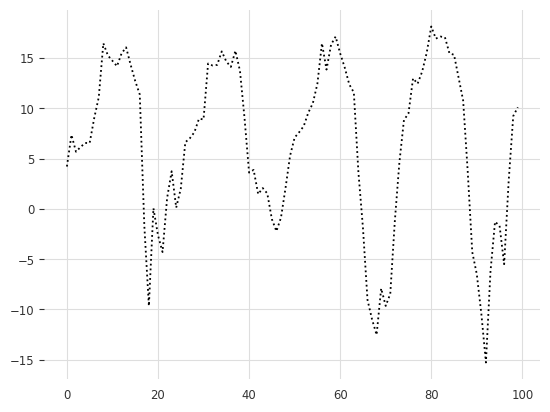

In [84]:
import matplotlib.pyplot as plt
values=df[df.columns[0]].values
plt.plot(test[-100:], linestyle = 'dotted')


In [78]:
check = datasets.ETTh1Dataset().load()
name = "ETTh1Dataset"
nummer= 0
save_name= "ETTh1Dataset" + str(nummer)
df = check.pd_dataframe()
values=df[df.columns[0]].values
splitted =split_array_equal_length(values,20)
train= splitted[:-2]
dev = splitted[-2]
test = splitted[-1]


In [79]:
test

array([  3.75099993,   5.55900002,   3.48300004,   9.44400024,
         8.10499954,   9.17599964,   8.97500038,   9.37699986,
         9.10900021,   7.83699989,  11.11900043,  11.25300026,
        13.52999973,  11.05200005,   9.77900028,  13.06099987,
        12.99400043,  14.19999981,  12.85999966,  10.98499966,
         5.69299984,   8.57299995,   9.10900021,   4.01900005,
         0.20100001,   5.55900002,   4.95699978,   2.21000004,
         7.56899977,   7.03299999,   6.83199978,   6.83199978,
         7.16699982,   9.04199982,  10.71700001,  13.19499969,
        15.00399971,  14.66899967,  13.32900047,  13.52999973,
        15.40499973,  13.9989996 ,   8.90799999,  -0.93800002,
        -9.10900021, -10.38199997, -13.12800026, -16.74500084,
       -17.88400078, -14.33399963, -10.91800022,  -6.89900017,
        -0.20100001,   5.55900002,   6.76499987,   7.43499994,
         6.89900017,   7.16699982,   8.77400017,  12.45800018,
        11.85499954,  10.91800022,  12.12300014,  11.78

In [264]:
values=df[df.columns[nummer]].values
splitted =split_array_equal_length(values,10)
train= splitted[:-2]
dev = splitted[-2]
test = splitted[-1]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [23]:
dfn = pd.DataFrame(columns=["main_part","len_main_part","forecasting_part","len_forecasting_part","min","max","median","dataset_name","dataset_desc", "season","trend","remain","season_forcasting","trend_forcasting","remain_forcasting"])

In [30]:
check = datasets.SunspotsDataset().load()
name = "SunspotsDataset"
splits= 10
period= 12

df = check.pd_dataframe()

for i in range(len(df.columns)):
    values = df[df.columns[i]].values
    
    
    splitted =split_array_equal_length(values,splits)
    train= splitted[:-2]
    dev = splitted[-2]
    test = splitted[-1]
    concatenated_df = arrays_to_dataframe([test])
    aufgabe = "test"
    save_name= name + str(i)
    min = scaling_parameter[scaling_parameter["datasetname"]== save_name]["min"].values[0]
    max = scaling_parameter[scaling_parameter["datasetname"]== save_name]["max"].values[0]
    

    for i in tqdm(range(len(concatenated_df))):
    
        #print(concatenated_df.iloc[i]["dataset_name"])   
      
        #get for this time serie the min max values for min-max scaler
        min = scaling_parameter[scaling_parameter["datasetname"]== save_name]["min"].values[0]
        max = scaling_parameter[scaling_parameter["datasetname"]== save_name]["max"].values[0]
    
        # use stl with loess on the dataset to get season trend and residual
        conc_ser_tog = concatenated_df.iloc[i]["values"]   
            
        #except:
           #print(concatenated_df.iloc[i]["dataset_name"])
            #pass 
    
        #set values to Dataframe
        main_pt,forecasting_pt = cut_list(conc_ser_tog,10)
        forecasting_pt =np.array(forecasting_pt)
        main_pt= np.array(main_pt)
        len_main_part = len(main_pt)
        len_forecasting_part = len(forecasting_pt)
        dataset_name = name
        dataset_desc = " " 
        minimum = np.array([np.min(main_pt)])
        maximum = np.array([np.max(main_pt)])
        median =  np.array([np.median(main_pt)])
       
            #len_main_part = serialize_arr(np.array([concatenated_df.iloc[i]["len_main_part"]]),settings)
          
        #len_forecasting_part = serialize_arr(np.array([concatenated_df.iloc[i]["len_forecasting_part"]]),settings)
                           
        #normalize values
        conc_ser_tog = [item for sublist in min_max_scale(conc_ser_tog,min,max) for item in sublist]                 
        main_part = [item for sublist in min_max_scale(main_pt,min,max) for item in sublist]
        forecasting_pt= [item for sublist in min_max_scale(forecasting_pt,min,max) for item in sublist]
        
        minimum= min_max_scale(minimum,min,max)[0]
        
        maximum= min_max_scale(maximum,min,max)[0]
        median = min_max_scale(median,min,max)[0]
        
    
        season, trend, remain = use_stl(conc_ser_tog,period)
        season, season_forecasting = cut_list(season, 10)
        trend, trend_forecasting = cut_list(trend, 10)
        remain, remain_forecasting = cut_list(remain, 10)
            
                    
        # encode values 
        forecasting_part = serialize_arr(np.asanyarray(forecasting_pt),settings)
        main_part = serialize_arr(np.asanyarray(main_part),settings)
        minimum =  serialize_arr(minimum,settings)
        
       
        maximum = serialize_arr(maximum,settings)
        median = serialize_arr(median,settings)
        
        season= serialize_arr(np.asanyarray(season),settings)
        trend = serialize_arr(np.asanyarray(trend),settings)
        remain= serialize_arr(np.asanyarray(remain),settings)
        
        season_forecasting= serialize_arr(np.asanyarray(season_forecasting),settings)
        trend_forecasting = serialize_arr(np.asanyarray(trend_forecasting),settings)
        remain_forecasting= serialize_arr(np.asanyarray(remain_forecasting),settings)
    
        
    
        column_d = {"main_part": main_part, "len_main_part":len_main_part,"forecasting_part": forecasting_part, "len_forecasting_part":len_forecasting_part, "min": minimum, "max": maximum, "median": median, "dataset_name":dataset_name, "dataset_desc":dataset_desc,"season":season,"trend":trend,"remain":remain, "season_forcasting":season_forecasting,"trend_forcasting":trend_forecasting,"remain_forcasting":remain_forecasting}
            
            
        dfn.loc[len(dfn)] = column_d
        dfn = dfn.reset_index(drop=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.87it/s]


In [31]:
dfn

,main_part,len_main_part,forecasting_part,len_forecasting_part,min,max,median,dataset_name,dataset_desc,season,trend,remain,season_forcasting,trend_forcasting,remain_forcasting
0,"5 7 0, 6 0 9, 5 6 5, 6 9 3, 6 6 4, 6 8 7...",783,"8 2 3, 8 3 6, 7 9 9, 7 6 4, 7 3 5, 4 5 3...",88,"1 0 4,","8 7 5,","6 7 7,",ETTh1Dataset,,"- 5 6, - 4 0, - 1 4, 2 2, 6 8, 6 1, 4 6...","6 5 6, 6 5 8, 6 6 0, 6 6 2, 6 6 5, 6 7 0...","- 2 8, - 7, - 8 0, 8, - 6 9, - 4 3, - 3...","1 6, 7 6, 8 5, 7 2, 3 0, - 3 0, - 7 2, ...","7 5 4, 7 2 9, 6 9 1, 6 5 3, 6 2 0, 5 8 6...","5 2, 3 1, 2 1, 3 8, 8 4, - 1 0 3, - 2 0..."
1,"5 3 6, 5 6 3, 4 9 5, 5 2 7, 4 8 6, 4 6 8...",783,"7 6 1, 7 4 3, 6 0 3, 6 4 4, 7 0 7, 5 5 8...",88,"3 9 1,","8 4 6,","5 9 9,",ETTh1Dataset,,"3 7, 3 6, 3 1, 0, 4, - 2 8, - 2 5, - 3...","5 1 2, 5 1 3, 5 1 4, 5 1 5, 5 1 6, 5 1 8...","- 1 4, 1 2, - 4 9, 1 0, - 3 4, - 2 1, -...","4, - 8, - 3 0, - 2 4, - 1 2, - 5 0, - 4...","6 8 1, 6 8 3, 6 6 8, 6 5 4, 6 3 3, 6 1 3...","7 5, 6 8, - 3 4, 1 4, 8 5, - 4, 2 0, -..."
2,"6 2 5, 6 5 9, 6 1 4, 7 4 8, 6 8 5, 7 3 7...",783,"8 5 5, 8 5 0, 8 0 0, 7 6 0, 7 9 3, 4 9 3...",88,"1 1 8,","8 8 1,","7 1 6,",ETTh1Dataset,,"- 6 1, - 4 5, - 1 1, 1 9, 6 1, 5 4, 3 8...","7 0 8, 7 1 0, 7 1 2, 7 1 5, 7 1 8, 7 2 3...","- 2 1, - 5, - 8 6, 1 3, - 9 5, - 4 0, -...","1 6, 7 2, 8 6, 7 1, 2 5, - 1 7, - 6 3, ...","7 8 0, 7 5 2, 7 1 3, 6 7 4, 6 4 2, 6 1 1...","5 7, 2 5, 0, 1 4, 1 2 5, - 1 0 0, - 2 4..."
3,"5 9 2, 6 1 2, 5 2 9, 5 2 2, 5 1 9, 5 1 6...",783,"7 4 0, 7 2 4, 5 9 4, 6 2 0, 7 2 2, 5 9 2...",88,"4 2 5,","7 7 6,","5 9 2,",ETTh1Dataset,,"2 0, 3 1, 1 9, 7, - 0, - 2 7, - 2 7, -...","5 5 1, 5 5 2, 5 5 2, 5 5 3, 5 5 4, 5 5 5...","1 9, 2 9, - 4 2, - 3 8, - 3 4, - 1 1, -...","1 0, - 1 7, - 3 4, - 2 3, - 6, - 3 8, 1...","6 7 6, 6 7 9, 6 6 8, 6 5 8, 6 4 2, 6 2 6...","5 3, 6 3, - 3 9, - 1 4, 8 5, 4, 6 0, -..."
4,"3 6 4, 3 5 5, 3 8 9, 4 1 5, 4 1 1, 4 3 3...",783,"5 8 8, 6 4 4, 6 3 8, 6 6 9, 4 0 2, 3 6 1...",88,"2 7 3,","7 5 7,","4 4 9,",ETTh1Dataset,,"0, - 1 6, - 1 2, 1 4, 6 2, 6 7, 5 5, -...","3 8 2, 3 8 2, 3 8 2, 3 8 3, 3 8 3, 3 8 4...","- 1 7, - 1 0, 1 9, 1 7, - 3 3, - 1 8, -...","9, 5 4, 3 6, 3 5, 3 9, - 5 9, - 7 4, -...","5 4 2, 5 4 2, 5 3 0, 5 1 8, 4 9 9, 4 8 0...","3 5, 4 7, 7 0, 1 1 5, - 1 3 7, - 5 9, 3..."
5,"5 5 1, 5 6 5, 5 9 9, 5 7 2, 5 5 8, 5 9 9...",783,"6 4 1, 6 6 1, 6 3 4, 6 8 9, 5 9 9, 5 9 3...",88,"3 1 0,","9 2 4,","6 2 7,",ETTh1Dataset,,"1 0, 9, 1 7, 1 2, 1 3, 1 4, 8, 4, - 4...","5 3 5, 5 3 4, 5 3 2, 5 3 1, 5 2 9, 5 2 7...","5, 2 1, 4 9, 2 8, 1 5, 5 8, - 2 9, - 1...","1 2, 8, 2, 1 1, 2 6, - 1 3, - 3 3, - 1...","6 1 7, 6 2 3, 6 2 5, 6 2 8, 6 2 6, 6 2 4...","1 2, 3 0, 6, 4 9, - 5 2, - 1 7, 3 3, 3..."
6,"2 1 1, 1 9 4, 1 9 1, 2 2 0, 2 5 3, 2 3 9...",783,"2 2 8, 2 5 3, 2 5 0, 2 7 8, 2 6 9, 2 7 9...",88,"1 2 0,","4 4 0,","2 6 9,",ETTh2Dataset,,"- 4, - 7, - 7, - 2, 2, 1 3, 6, - 3, 1...","2 2 3, 2 2 3, 2 2 4, 2 2 4, 2 2 5, 2 2 6...","- 6, - 2 1, - 2 5, - 1, 2 6, 0, - 2 5, ...","- 9, - 5, - 8, - 1 4, 2, 1 9, 5, 1 2, ...","2 7 0, 2 6 8, 2 6 6, 2 6 5, 2 6 5, 2 6 5...","- 3 2, - 9, - 7, 2 8, 1, - 5, - 2 6, -..."
7,"4 7 8, 4 8 6, 4 6 8, 4 9 6, 4 9 0, 4 8 4...",783,"4 9 6, 5 0 6, 5 2 4, 5 2 4, 5 2 4, 5 3 3...",88,"3 3 8,","6 2 9,","4 9 3,",ETTh2Dataset,,"2, 1 1, 7, 6, 0, 6, - 3, - 1 5, 1 2, ...","4 8 1, 4 8 1, 4 8 1, 4 8 2, 4 8 2, 4 8 3...","- 4, - 6, - 2 1, 8, 7, - 5, - 1 5, - 2...","- 0, - 8, - 9, - 1 7, - 7, 1 2, - 2, 9...","5 2 1, 5 2 0, 5 1 8, 5 1 6, 5 1 6, 5 1 5...","- 2 4, - 6, 1 5, 2 4, 1 5, 5, - 3 9, -..."
8,"3 0 0, 2 7 4, 2 6 9, 3 0 9, 3 1 4, 3 0 8...",783,"2 9 8, 3 2 8, 3 2 4, 3 3 5, 3 6 2, 3 8 7...",88,"1 4 5,","5 4 8,","3 5 9,",ETTh2Dataset,,"- 2, - 4, - 7, - 3, - 3, 1 0, - 4, - 8...","2 9 1, 2 9 1, 2 9 1, 2 9 1, 2 9 1, 2 9 1...","1 0, - 1 2, - 1 3, 2 1, 2 6, 6, - 2 4, ...","- 9, - 1 0, - 1 7, - 2 3, 3, 2 9, 6, 1...","3 5 1, 3 5 0, 3 5 0, 3 5 1, 3 5 4, 3 5 7...","- 4 3, - 1 0, - 8, 7, 4, - 0, - 2 5, -..."
9,"4 6 4, 4 7 4, 4 4 2, 4 8 5, 4 5 1, 4 4 3...",783,"4 5 9, 4 7 7, 4 9 5, 4 7 9, 5 0 6, 5 2 8...",88,"2 6 6,","6 2 8,","

In [34]:
all_json_objects = []

for i in range(len(dfn)):

    json_data = {"input": {}, "output": {}, "len_main_part" : {},"len_forecasting_part":{},"min":{},"max":{},"median":{},"dataset_name":{},"dataset_desc":{},"season": {},"trend": {},"remain": {},"season_forcasting":{},"trend_forcasting":{},"remain_forcasting":{} }

    json_data["input"]= dfn["main_part"].iloc[i]
    json_data["output"] = dfn["forecasting_part"].iloc[i]


    json_data["len_main_part"]= str(dfn["len_main_part"].iloc[i])
    json_data["len_forecasting_part"]= str(dfn["len_forecasting_part"].iloc[i])
    json_data["min"]= dfn["min"].iloc[i]
    json_data["max"]= dfn["max"].iloc[i]
    json_data["median"]= dfn["median"].iloc[i]
    json_data["dataset_name"]= dfn["dataset_name"].iloc[i]
    json_data["dataset_desc"]= dfn["dataset_desc"].iloc[i]
    json_data["season"] = dfn["season"].iloc[i]
    json_data["trend"] = dfn["trend"].iloc[i]
    json_data["remain"] = dfn["remain"].iloc[i]
    
    json_data["season_forcasting"] = dfn["season_forcasting"].iloc[i]
    json_data["trend_forcasting"] = dfn["trend_forcasting"].iloc[i]
    json_data["remain_forcasting"] = dfn["remain_forcasting"].iloc[i]
    
    
    all_json_objects.append(json_data)
path_dfn = r"univariate\\dataset_new\\" +aufgabe +"\\"+ "Decom_norm_enc_test_dataset"+".json"
with open(path_dfn, "w") as f:
    json.dump(all_json_objects, f, indent=4)   
    
    
    


In [33]:
dfn

,main_part,len_main_part,forecasting_part,len_forecasting_part,min,max,median,dataset_name,dataset_desc,season,trend,remain,season_forcasting,trend_forcasting,remain_forcasting
0,"5 7 0, 6 0 9, 5 6 5, 6 9 3, 6 6 4, 6 8 7...",783,"8 2 3, 8 3 6, 7 9 9, 7 6 4, 7 3 5, 4 5 3...",88,"1 0 4,","8 7 5,","6 7 7,",ETTh1Dataset,,"- 5 6, - 4 0, - 1 4, 2 2, 6 8, 6 1, 4 6...","6 5 6, 6 5 8, 6 6 0, 6 6 2, 6 6 5, 6 7 0...","- 2 8, - 7, - 8 0, 8, - 6 9, - 4 3, - 3...","1 6, 7 6, 8 5, 7 2, 3 0, - 3 0, - 7 2, ...","7 5 4, 7 2 9, 6 9 1, 6 5 3, 6 2 0, 5 8 6...","5 2, 3 1, 2 1, 3 8, 8 4, - 1 0 3, - 2 0..."
1,"5 3 6, 5 6 3, 4 9 5, 5 2 7, 4 8 6, 4 6 8...",783,"7 6 1, 7 4 3, 6 0 3, 6 4 4, 7 0 7, 5 5 8...",88,"3 9 1,","8 4 6,","5 9 9,",ETTh1Dataset,,"3 7, 3 6, 3 1, 0, 4, - 2 8, - 2 5, - 3...","5 1 2, 5 1 3, 5 1 4, 5 1 5, 5 1 6, 5 1 8...","- 1 4, 1 2, - 4 9, 1 0, - 3 4, - 2 1, -...","4, - 8, - 3 0, - 2 4, - 1 2, - 5 0, - 4...","6 8 1, 6 8 3, 6 6 8, 6 5 4, 6 3 3, 6 1 3...","7 5, 6 8, - 3 4, 1 4, 8 5, - 4, 2 0, -..."
2,"6 2 5, 6 5 9, 6 1 4, 7 4 8, 6 8 5, 7 3 7...",783,"8 5 5, 8 5 0, 8 0 0, 7 6 0, 7 9 3, 4 9 3...",88,"1 1 8,","8 8 1,","7 1 6,",ETTh1Dataset,,"- 6 1, - 4 5, - 1 1, 1 9, 6 1, 5 4, 3 8...","7 0 8, 7 1 0, 7 1 2, 7 1 5, 7 1 8, 7 2 3...","- 2 1, - 5, - 8 6, 1 3, - 9 5, - 4 0, -...","1 6, 7 2, 8 6, 7 1, 2 5, - 1 7, - 6 3, ...","7 8 0, 7 5 2, 7 1 3, 6 7 4, 6 4 2, 6 1 1...","5 7, 2 5, 0, 1 4, 1 2 5, - 1 0 0, - 2 4..."
3,"5 9 2, 6 1 2, 5 2 9, 5 2 2, 5 1 9, 5 1 6...",783,"7 4 0, 7 2 4, 5 9 4, 6 2 0, 7 2 2, 5 9 2...",88,"4 2 5,","7 7 6,","5 9 2,",ETTh1Dataset,,"2 0, 3 1, 1 9, 7, - 0, - 2 7, - 2 7, -...","5 5 1, 5 5 2, 5 5 2, 5 5 3, 5 5 4, 5 5 5...","1 9, 2 9, - 4 2, - 3 8, - 3 4, - 1 1, -...","1 0, - 1 7, - 3 4, - 2 3, - 6, - 3 8, 1...","6 7 6, 6 7 9, 6 6 8, 6 5 8, 6 4 2, 6 2 6...","5 3, 6 3, - 3 9, - 1 4, 8 5, 4, 6 0, -..."
4,"3 6 4, 3 5 5, 3 8 9, 4 1 5, 4 1 1, 4 3 3...",783,"5 8 8, 6 4 4, 6 3 8, 6 6 9, 4 0 2, 3 6 1...",88,"2 7 3,","7 5 7,","4 4 9,",ETTh1Dataset,,"0, - 1 6, - 1 2, 1 4, 6 2, 6 7, 5 5, -...","3 8 2, 3 8 2, 3 8 2, 3 8 3, 3 8 3, 3 8 4...","- 1 7, - 1 0, 1 9, 1 7, - 3 3, - 1 8, -...","9, 5 4, 3 6, 3 5, 3 9, - 5 9, - 7 4, -...","5 4 2, 5 4 2, 5 3 0, 5 1 8, 4 9 9, 4 8 0...","3 5, 4 7, 7 0, 1 1 5, - 1 3 7, - 5 9, 3..."
5,"5 5 1, 5 6 5, 5 9 9, 5 7 2, 5 5 8, 5 9 9...",783,"6 4 1, 6 6 1, 6 3 4, 6 8 9, 5 9 9, 5 9 3...",88,"3 1 0,","9 2 4,","6 2 7,",ETTh1Dataset,,"1 0, 9, 1 7, 1 2, 1 3, 1 4, 8, 4, - 4...","5 3 5, 5 3 4, 5 3 2, 5 3 1, 5 2 9, 5 2 7...","5, 2 1, 4 9, 2 8, 1 5, 5 8, - 2 9, - 1...","1 2, 8, 2, 1 1, 2 6, - 1 3, - 3 3, - 1...","6 1 7, 6 2 3, 6 2 5, 6 2 8, 6 2 6, 6 2 4...","1 2, 3 0, 6, 4 9, - 5 2, - 1 7, 3 3, 3..."
6,"2 1 1, 1 9 4, 1 9 1, 2 2 0, 2 5 3, 2 3 9...",783,"2 2 8, 2 5 3, 2 5 0, 2 7 8, 2 6 9, 2 7 9...",88,"1 2 0,","4 4 0,","2 6 9,",ETTh2Dataset,,"- 4, - 7, - 7, - 2, 2, 1 3, 6, - 3, 1...","2 2 3, 2 2 3, 2 2 4, 2 2 4, 2 2 5, 2 2 6...","- 6, - 2 1, - 2 5, - 1, 2 6, 0, - 2 5, ...","- 9, - 5, - 8, - 1 4, 2, 1 9, 5, 1 2, ...","2 7 0, 2 6 8, 2 6 6, 2 6 5, 2 6 5, 2 6 5...","- 3 2, - 9, - 7, 2 8, 1, - 5, - 2 6, -..."
7,"4 7 8, 4 8 6, 4 6 8, 4 9 6, 4 9 0, 4 8 4...",783,"4 9 6, 5 0 6, 5 2 4, 5 2 4, 5 2 4, 5 3 3...",88,"3 3 8,","6 2 9,","4 9 3,",ETTh2Dataset,,"2, 1 1, 7, 6, 0, 6, - 3, - 1 5, 1 2, ...","4 8 1, 4 8 1, 4 8 1, 4 8 2, 4 8 2, 4 8 3...","- 4, - 6, - 2 1, 8, 7, - 5, - 1 5, - 2...","- 0, - 8, - 9, - 1 7, - 7, 1 2, - 2, 9...","5 2 1, 5 2 0, 5 1 8, 5 1 6, 5 1 6, 5 1 5...","- 2 4, - 6, 1 5, 2 4, 1 5, 5, - 3 9, -..."
8,"3 0 0, 2 7 4, 2 6 9, 3 0 9, 3 1 4, 3 0 8...",783,"2 9 8, 3 2 8, 3 2 4, 3 3 5, 3 6 2, 3 8 7...",88,"1 4 5,","5 4 8,","3 5 9,",ETTh2Dataset,,"- 2, - 4, - 7, - 3, - 3, 1 0, - 4, - 8...","2 9 1, 2 9 1, 2 9 1, 2 9 1, 2 9 1, 2 9 1...","1 0, - 1 2, - 1 3, 2 1, 2 6, 6, - 2 4, ...","- 9, - 1 0, - 1 7, - 2 3, 3, 2 9, 6, 1...","3 5 1, 3 5 0, 3 5 0, 3 5 1, 3 5 4, 3 5 7...","- 4 3, - 1 0, - 8, 7, 4, - 0, - 2 5, -..."
9,"4 6 4, 4 7 4, 4 4 2, 4 8 5, 4 5 1, 4 4 3...",783,"4 5 9, 4 7 7, 4 9 5, 4 7 9, 5 0 6, 5 2 8...",88,"2 6 6,","6 2 8,","

## Vanilla prompt

In [69]:
dfn = pd.DataFrame(columns=["main_part","len_main_part","forecasting_part","len_forecasting_part","min","max","median","dataset_name","dataset_desc"])
    

In [77]:
check = datasets.SunspotsDataset().load()
name = "SunspotsDataset"
splits= 10
periods= 12


df = check.pd_dataframe()

for i in range(len(df.columns)):
    values=df[df.columns[i]].values
    save_name= name + str(i)
    
    splitted =split_array_equal_length(values,splits)
    train= splitted[:-2]
    dev = splitted[-2]
    test = splitted[-1]
    concatenated_df = arrays_to_dataframe([test])
    aufgabe = "test"
    for i in tqdm(range(len(concatenated_df))):
        
        conc_ser_tog = concatenated_df.iloc[i]["values"]   
        #set values to Dataframe
        main_pt,forecasting_pt = cut_list(conc_ser_tog,10)
        
        len_main_part = len(main_pt)
        len_forecasting_part = len(forecasting_pt)
        dataset_name = name
        dataset_desc = "The Electricity Transformer Temperature (ETT) is a crucial indicator in the electric power long-term deployment. This dataset consists of 2 years data from two separated counties in China. To explore the granularity on the Long sequence time-series forecasting (LSTF) problem, different subsets are created, {ETTh1, ETTh2} for 1-hour-level and ETTm1 for 15-minutes-level. Each data point consists of the target value ”oil temperature” and 6 power load features. The train/val/test is 12/4/4 months. " 
        minimum = np.min(main_pt)
        maximum = np.max(main_pt)
        median = np.median(main_pt)
        
        column_d = {"main_part": main_pt, "len_main_part":len_main_part,"forecasting_part": forecasting_pt, "len_forecasting_part":len_forecasting_part, "min": minimum, "max": maximum, "median": median, "dataset_name":dataset_name, "dataset_desc":dataset_desc}
        
        
        dfn.loc[len(dfn)] = column_d
        dfn = dfn.reset_index(drop=True)


10


In [78]:
dfn

,main_part,len_main_part,forecasting_part,len_forecasting_part,min,max,median,dataset_name,dataset_desc
0,"[3.750999927520752, 5.559000015258789, 3.48300...",783,"[15.472000122070312, 16.075000762939453, 14.33...",88,-17.884001,17.884001,8.707000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
1,"[3.2149999141693115, 3.617000102996826, 2.6119...",783,"[6.564000129699707, 6.296000003814697, 4.21999...",88,1.072000,7.837000,4.153000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
2,"[1.4570000171661377, 2.9140000343322754, 0.995...",783,"[11.194000244140623, 10.979999542236328, 8.883...",88,-20.077000,12.331000,5.330000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
3,"[2.1679999828338623, 2.45199990272522, 1.31500...",783,"[4.192999839782715, 3.9800000190734863, 2.2030...",88,-0.107000,4.691000,2.168000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
4,"[2.345000028610229, 2.253999948501587, 2.58899...",783,"[4.507999897003174, 5.056000232696533, 4.99499...",88,1.462000,6.153000,3.168000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
5,"[1.065999984741211, 1.1269999742507937, 1.2790...",783,"[1.462000012397766, 1.5529999732971191, 1.4320...",88,0.000000,2.711000,1.401000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
6,"[7.105000019073486, 7.175000190734862, 7.31599...",783,"[5.908999919891357, 6.261000156402588, 6.68300...",88,3.025000,14.351000,9.638000,ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
7,"[22.86899948120117, 21.025999069213867, 20.690...",783,"[24.62800025939941, 27.308000564575195, 27.056...",88,12.984000,47.495998,29.066999,ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...
8,"[7.706999778747559, 8.125, 7.119999885559082, ...",783,"[8.711999893188478, 9.21399974822998, 10.22000...",88,0.000000,16.000000,8.544000,ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...
9,"[35.86600112915039, 33.748001098632805, 33.346...",783,"[35.678001403808594, 38.17100143432617, 37.796...",88,23.160000,56.185001,40.691002,ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...


In [79]:
all_json_objects = []

for i in range(len(dfn)):

    json_data = {"input": {}, "output": {}, "len_main_part" : {},"len_forecasting_part":{},"min":{},"max":{},"median":{},"dataset_name":{},"dataset_desc":{} }

    json_data["input"]= np.array2string(dfn["main_part"].iloc[i])
    json_data["output"] = np.array2string(dfn["forecasting_part"].iloc[i])


    json_data["len_main_part"]= str(dfn["len_main_part"].iloc[i])
    json_data["len_forecasting_part"]= str(dfn["len_forecasting_part"].iloc[i])
    json_data["min"]= str(dfn["min"].iloc[i])
    json_data["max"]= str(dfn["max"].iloc[i])
    json_data["median"]= dfn["median"].iloc[i]
    json_data["dataset_name"]= dfn["dataset_name"].iloc[i]
    json_data["dataset_desc"]= dfn["dataset_desc"].iloc[i]

    all_json_objects.append(json_data)
path_dfn = r"Experiment_dataset\Vanilla_final_test_dataset.json"
with open(path_dfn, "w") as f:
    json.dump(all_json_objects, f, indent=4)   
    
    

## Encoding

In [80]:
dfn = pd.DataFrame(columns=["main_part","len_main_part","forecasting_part","len_forecasting_part","min","max","median","dataset_name","dataset_desc"])   

In [87]:
check = datasets.ETTm2Dataset().load()
name = "ETTm2Dataset"
splits= 80
periods= 15


df = check.pd_dataframe()

for i in range(len(df.columns)-1):
    values=df[df.columns[i]].values
    save_name= name + str(i)
    
    splitted =split_array_equal_length(values,splits)
    train= splitted[:-2]
    dev = splitted[-2]
    test = splitted[-1]
   
    concatenated_df = arrays_to_dataframe([test])
    aufgabe = "test"
    for i in tqdm(range(len(concatenated_df))):
        
        conc_ser_tog = concatenated_df.iloc[i]["values"]  
        
        #set values to Dataframe
        main_pt,forecasting_pt = cut_list(conc_ser_tog,10)
        
        len_main_part = len(main_pt)
        len_forecasting_part = len(forecasting_pt)
        dataset_name = name
        #dataset_desc = "The Electricity Transformer Temperature (ETT) is a crucial indicator in the electric power long-term deployment. This dataset consists of 2 years data from two separated counties in China. To explore the granularity on the Long sequence time-series forecasting (LSTF) problem, different subsets are created, {ETTh1, ETTh2} for 1-hour-level and ETTm1 for 15-minutes-level. Each data point consists of the target value ”oil temperature” and 6 power load features. The train/val/test is 12/4/4 months. " 
        minimum = np.min(main_pt)
        maximum = np.max(main_pt)
        median = np.median(main_pt)
        
        forecasting_part = serialize_arr(np.asanyarray(forecasting_pt),settings)
        main_part = serialize_arr(np.asanyarray(main_pt),settings)
        
        minimum =  serialize_arr(np.array([minimum]),settings)
    
   
        maximum = serialize_arr(np.array([maximum]),settings)
        median = serialize_arr(np.array([median]),settings)
        
        
        column_d = {"main_part": main_part, "len_main_part":len_main_part,"forecasting_part": forecasting_part, "len_forecasting_part":len_forecasting_part, "min": minimum, "max": maximum, "median": median, "dataset_name":dataset_name, "dataset_desc":dataset_desc}
        
        
        dfn.loc[len(dfn)] = column_d
        dfn = dfn.reset_index(drop=True)


10


In [88]:
dfn

,main_part,len_main_part,forecasting_part,len_forecasting_part,min,max,median,dataset_name,dataset_desc
0,"3 7 5 0, 5 5 5 9, 3 4 8 3, 9 4 4 4, 8 1 0...",783,"1 5 4 7 2, 1 6 0 7 5, 1 4 3 3 3, 1 2 7 2 5...",88,"- 1 7 8 8 4,","1 7 8 8 4,","8 7 0 6,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
1,"3 2 1 4, 3 6 1 7, 2 6 1 1, 3 0 8 1, 2 4 7...",783,"6 5 6 4, 6 2 9 6, 4 2 1 9, 4 8 2 2, 5 7 6...",88,"1 0 7 2,","7 8 3 6,","4 1 5 2,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
2,"1 4 5 7, 2 9 1 4, 9 9 5, 6 6 8 1, 3 9 8 0...",783,"1 1 1 9 4, 1 0 9 7 9, 8 8 8 3, 7 1 7 7, 8...",88,"- 2 0 0 7 6,","1 2 3 3 1,","5 3 2 9,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
3,"2 1 6 7, 2 4 5 1, 1 3 1 5, 1 2 0 7, 1 1 7...",783,"4 1 9 2, 3 9 8 0, 2 2 0 3, 2 5 5 9, 3 9 4...",88,"- 1 0 7,","4 6 9 0,","2 1 6 7,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
4,"2 3 4 5, 2 2 5 3, 2 5 8 8, 2 8 3 2, 2 8 0...",783,"4 5 0 7, 5 0 5 6, 4 9 9 4, 5 3 0 0, 2 7 1...",88,"1 4 6 2,","6 1 5 2,","3 1 6 7,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
5,"1 0 6 5, 1 1 2 6, 1 2 7 9, 1 1 5 6, 1 0 9...",783,"1 4 6 2, 1 5 5 2, 1 4 3 2, 1 6 7 4, 1 2 7...",88,"0,","2 7 1 0,","1 4 0 1,",ETTh1Dataset,The Electricity Transformer Temperature (ETT) ...
6,"2 2 8 6 8, 2 1 0 2 5, 2 0 6 9 0, 2 3 7 9 0...",783,"2 4 6 2 8, 2 7 3 0 8, 2 7 0 5 6, 3 0 0 7 2...",88,"1 2 9 8 4,","4 7 4 9 5,","2 9 0 6 6,",ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...
7,"7 7 0 6, 8 1 2 4, 7 1 1 9, 8 7 1 1, 8 3 7...",783,"8 7 1 1, 9 2 1 3, 1 0 2 2 0, 1 0 2 2 0, 1...",88,"0,","1 6 0 0 0,","8 5 4 3,",ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...
8,"3 5 8 6 6, 3 3 7 4 8, 3 3 3 4 6, 3 6 5 9 0...",783,"3 5 6 7 8, 3 8 1 7 1, 3 7 7 9 6, 3 8 7 3 4...",88,"2 3 1 5 9,","5 6 1 8 5,","4 0 6 9 1,",ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...
9,"9 8 1 0, 1 0 1 8 5, 9 0 3 4, 1 0 5 6 0, 9...",783,"9 6 4 9, 1 0 2 9 3, 1 0 9 0 9, 1 0 3 4 7, ...",88,"2 8 1 5,","1 5 6 2 8,","9 6 4 9,",ETTh2Dataset,The Electricity Transformer Temperature (ETT) ...


In [89]:
all_json_objects = []

for i in range(len(dfn)):

    json_data = {"input": {}, "output": {}, "len_main_part" : {},"len_forecasting_part":{},"min":{},"max":{},"median":{},"dataset_name":{},"dataset_desc":{} }

    json_data["input"]= dfn["main_part"].iloc[i]
    json_data["output"] = dfn["forecasting_part"].iloc[i]


    json_data["len_main_part"]= str(dfn["len_main_part"].iloc[i])
    json_data["len_forecasting_part"]= str(dfn["len_forecasting_part"].iloc[i])
    json_data["min"]= dfn["min"].iloc[i]
    json_data["max"]= dfn["max"].iloc[i]
    json_data["median"]= dfn["median"].iloc[i]
    json_data["dataset_name"]= dfn["dataset_name"].iloc[i]
    json_data["dataset_desc"]= dfn["dataset_desc"].iloc[i]

    all_json_objects.append(json_data)
path_dfn = r"Experiment_dataset\Encoded_final_test_dataset.json"
with open(path_dfn, "w") as f:
    json.dump(all_json_objects, f, indent=4)   
    
    

In [90]:
scaling_parameter

,datasetname,min,max
0,ArticularyWordRecognition,-5.099600,4.888700
1,AtrialFibrillation,-2.219500,1.568700
2,BasicMotions,-23.000828,29.068570
3,Cricket,-3.754300,2.707700
4,DuckDuckGeese,0.000004,265.300000
5,Epilepsy,-3.470000,3.220000
6,ERing,-3.114369,2.507158
7,EthanolConcentration,-104.960000,29507.000000
8,FaceDetection,-24.327769,24.326942
9,FingerMovements,-157.000000,205.100000


## Normalization

In [93]:
dfn = pd.DataFrame(columns=["main_part","len_main_part","forecasting_part","len_forecasting_part","min","max","median","dataset_name","dataset_desc"])   

In [107]:
check = datasets.SunspotsDataset().load()
name = "SunspotsDataset"
splits= 10

df = check.pd_dataframe()

for i in range(len(df.columns)):
    values=df[df.columns[i]].values
    
    
    splitted =split_array_equal_length(values,splits)
    train= splitted[:-2]
    dev = splitted[-2]
    test = splitted[-1]
    concatenated_df = arrays_to_dataframe([test])
    aufgabe = "test"
    save_name= name + str(i)
    min = scaling_parameter[scaling_parameter["datasetname"]== save_name]["min"].values[0]
    max = scaling_parameter[scaling_parameter["datasetname"]== save_name]["max"].values[0]
    
    for i in tqdm(range(len(concatenated_df))):
        
        print(i)
        
        conc_ser_tog = concatenated_df.iloc[i]["values"]   
        #set values to Dataframe
        main_pt,forecasting_pt = cut_list(conc_ser_tog,10)

        
        
        len_main_part = len(main_pt)
        len_forecasting_part = len(forecasting_pt)
        dataset_name = name
        #dataset_desc = "The Electricity Transformer Temperature (ETT) is a crucial indicator in the electric power long-term deployment. This dataset consists of 2 years data from two separated counties in China. To explore the granularity on the Long sequence time-series forecasting (LSTF) problem, different subsets are created, {ETTh1, ETTh2} for 1-hour-level and ETTm1 for 15-minutes-level. Each data point consists of the target value ”oil temperature” and 6 power load features. The train/val/test is 12/4/4 months. " 
        minimum = np.min(main_pt)
        maximum = np.max(main_pt)
        median = np.median(main_pt)
        
        
        conc_ser_tog = [item for sublist in min_max_scale(conc_ser_tog,min,max) for item in sublist]                 
        main_part = [item for sublist in min_max_scale(main_pt,min,max) for item in sublist]
        forecasting_pt= [item for sublist in min_max_scale(forecasting_pt,min,max) for item in sublist]
    
        minimum= min_max_scale(minimum,min,max)[0]
        
        maximum= min_max_scale(maximum,min,max)[0]
        median = min_max_scale(median,min,max)[0]

        

        forecasting_part = serialize_arr(np.asanyarray(forecasting_pt),settings)
        main_part = serialize_arr(np.asanyarray(main_part),settings)
        
        minimum =  serialize_arr(np.array([minimum]),settings)
    
   
        maximum = serialize_arr(np.array([maximum]),settings)
        median = serialize_arr(np.array([median]),settings)
        
        
        column_d = {"main_part": main_part, "len_main_part":len_main_part,"forecasting_part": forecasting_part, "len_forecasting_part":len_forecasting_part, "min": minimum, "max": maximum, "median": median, "dataset_name":save_name, "dataset_desc":dataset_desc}
        
        
        dfn.loc[len(dfn)] = column_d
        dfn = dfn.reset_index(drop=True)


10

0


In [108]:
dfn

,main_part,len_main_part,forecasting_part,len_forecasting_part,min,max,median,dataset_name,dataset_desc
0,"5 7 0, 6 0 9, 5 6 5, 6 9 3, 6 6 4, 6 8 7...",783,"8 2 3, 8 3 6, 7 9 9, 7 6 4, 7 3 5, 4 5 3...",88,"[0 0 0 0 0 0 0 1 0 4],","[0 0 0 0 0 0 0 8 7 5],","[0 0 0 0 0 0 0 6 7 7],",ETTh1Dataset0,The Electricity Transformer Temperature (ETT) ...
1,"5 3 6, 5 6 3, 4 9 5, 5 2 7, 4 8 6, 4 6 8...",783,"7 6 1, 7 4 3, 6 0 3, 6 4 4, 7 0 7, 5 5 8...",88,"[0 0 0 0 0 0 0 3 9 1],","[0 0 0 0 0 0 0 8 4 6],","[0 0 0 0 0 0 0 5 9 9],",ETTh1Dataset1,The Electricity Transformer Temperature (ETT) ...
2,"6 2 5, 6 5 9, 6 1 4, 7 4 8, 6 8 5, 7 3 7...",783,"8 5 5, 8 5 0, 8 0 0, 7 6 0, 7 9 3, 4 9 3...",88,"[0 0 0 0 0 0 0 1 1 8],","[0 0 0 0 0 0 0 8 8 1],","[0 0 0 0 0 0 0 7 1 6],",ETTh1Dataset2,The Electricity Transformer Temperature (ETT) ...
3,"5 9 2, 6 1 2, 5 2 9, 5 2 2, 5 1 9, 5 1 6...",783,"7 4 0, 7 2 4, 5 9 4, 6 2 0, 7 2 2, 5 9 2...",88,"[0 0 0 0 0 0 0 4 2 5],","[0 0 0 0 0 0 0 7 7 6],","[0 0 0 0 0 0 0 5 9 2],",ETTh1Dataset3,The Electricity Transformer Temperature (ETT) ...
4,"3 6 4, 3 5 5, 3 8 9, 4 1 5, 4 1 1, 4 3 3...",783,"5 8 8, 6 4 4, 6 3 8, 6 6 9, 4 0 2, 3 6 1...",88,"[0 0 0 0 0 0 0 2 7 3],","[0 0 0 0 0 0 0 7 5 7],","[0 0 0 0 0 0 0 4 4 9],",ETTh1Dataset4,The Electricity Transformer Temperature (ETT) ...
5,"5 5 1, 5 6 5, 5 9 9, 5 7 2, 5 5 8, 5 9 9...",783,"6 4 1, 6 6 1, 6 3 4, 6 8 9, 5 9 9, 5 9 3...",88,"[0 0 0 0 0 0 0 3 1 0],","[0 0 0 0 0 0 0 9 2 4],","[0 0 0 0 0 0 0 6 2 7],",ETTh1Dataset5,The Electricity Transformer Temperature (ETT) ...
6,"2 1 1, 1 9 4, 1 9 1, 2 2 0, 2 5 3, 2 3 9...",783,"2 2 8, 2 5 3, 2 5 0, 2 7 8, 2 6 9, 2 7 9...",88,"[0 0 0 0 0 0 0 1 2 0],","[0 0 0 0 0 0 0 4 4 0],","[0 0 0 0 0 0 0 2 6 9],",ETTh2Dataset0,The Electricity Transformer Temperature (ETT) ...
7,"4 7 8, 4 8 6, 4 6 8, 4 9 6, 4 9 0, 4 8 4...",783,"4 9 6, 5 0 6, 5 2 4, 5 2 4, 5 2 4, 5 3 3...",88,"[0 0 0 0 0 0 0 3 3 8],","[0 0 0 0 0 0 0 6 2 9],","[0 0 0 0 0 0 0 4 9 3],",ETTh2Dataset1,The Electricity Transformer Temperature (ETT) ...
8,"3 0 0, 2 7 4, 2 6 9, 3 0 9, 3 1 4, 3 0 8...",783,"2 9 8, 3 2 8, 3 2 4, 3 3 5, 3 6 2, 3 8 7...",88,"[0 0 0 0 0 0 0 1 4 5],","[0 0 0 0 0 0 0 5 4 8],","[0 0 0 0 0 0 0 3 5 9],",ETTh2Dataset2,The Electricity Transformer Temperature (ETT) ...
9,"4 6 4, 4 7 4, 4 4 2, 4 8 5, 4 5 1, 4 4 3...",783,"4 5 9, 4 7 7, 4 9 5, 4 7 9, 5 0 6, 5 2 8...",88,"[0 0 0 0 0 0 0 2 6 6],","[0 0 0 0 0 0 0 6 2 8],","[0 0 0 0 0 0 0 4 5 9],",ETTh2Dataset3,The Electricity Transformer Temperature (ETT) ...


In [109]:
all_json_objects = []

for i in range(len(dfn)):

    json_data = {"input": {}, "output": {}, "len_main_part" : {},"len_forecasting_part":{},"min":{},"max":{},"median":{},"dataset_name":{},"dataset_desc":{} }

    json_data["input"]= dfn["main_part"].iloc[i]
    json_data["output"] = dfn["forecasting_part"].iloc[i]


    json_data["len_main_part"]= str(dfn["len_main_part"].iloc[i])
    json_data["len_forecasting_part"]= str(dfn["len_forecasting_part"].iloc[i])
    json_data["min"]= dfn["min"].iloc[i]
    json_data["max"]= dfn["max"].iloc[i]
    json_data["median"]= dfn["median"].iloc[i]
    json_data["dataset_name"]= dfn["dataset_name"].iloc[i]
    json_data["dataset_desc"]= dfn["dataset_desc"].iloc[i]

    all_json_objects.append(json_data)
path_dfn = r"Experiment_dataset\Normalized_Encoded_final_test_dataset.json"
with open(path_dfn, "w") as f:
    json.dump(all_json_objects, f, indent=4)   
    